# Basic Scipy/OpenCV image processing

## SciPy or CV2 to load an image, storing it as "unnormalized image."

Display the image using MatPlotlib.

(-0.5, 1599.5, 1066.5, -0.5)

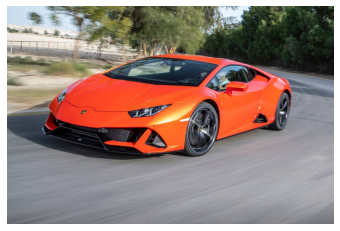

In [ ]:
#1 SciPy or CV2 to load an image, storing it as "unnormalized image." Display the image using MatPlotlib.

from google.colab.patches import cv2_imshow
import imageio

path = 'lambo.jpg'
#img = cv2.imread(path,0)
unormalized_image = cv2.imread(path)

plt.figure()
plt.imshow(cv2.cvtColor(unormalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Decrease the contrast of lab_image, storing the result as decont_image.
Display the image.

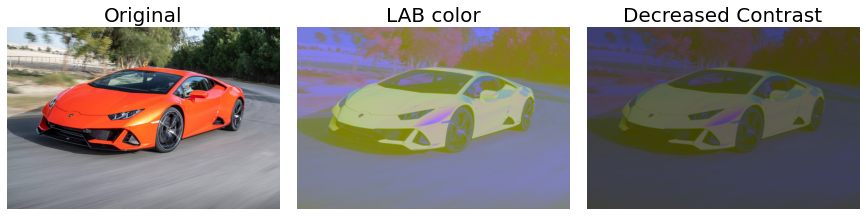

In [ ]:
#2 Decrease the contract of lab_image

lab_image = cv2.cvtColor(unormalized_image, cv2.COLOR_BGR2LAB)

alpha = 2
beta = 0
decont_image = lab_image//alpha + beta
#decont_image = cv2.convertScaleAbs(lab_image, alpha=alpha, beta=beta)

plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(cv2.cvtColor(unormalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original', fontsize=20)
plt.subplot(132)
plt.imshow(cv2.cvtColor(lab_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('LAB color', fontsize=20)
plt.subplot(133)
plt.imshow(cv2.cvtColor(decont_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Decreased Contrast', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()


## Blur an image with a Gaussian filter of different kernal sizes.

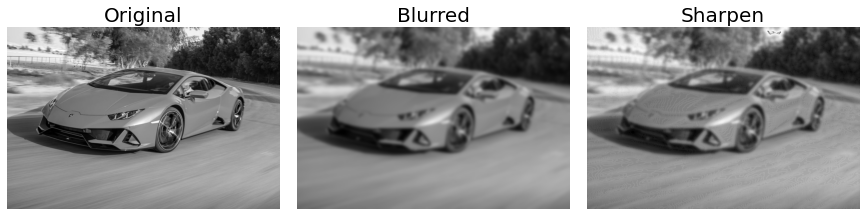

In [ ]:
#3 Blur and sharpen images

from scipy import ndimage

img_gray = cv2.cvtColor(unormalized_image, cv2.COLOR_BGR2GRAY)

blurred_img = ndimage.gaussian_filter(img_gray, 8)
filter_blurred = ndimage.gaussian_filter(blurred_img, 1)
alpha = 10
sharpened = blurred_img + alpha * (blurred_img - filter_blurred)

plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original', fontsize=20)
plt.subplot(132)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blurred', fontsize=20)
plt.subplot(133)
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Sharpen', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

## Write a function that convolves an image with a given convolution filter function. 

### <center><cod>def myImageFilter(img0, h)</code></center>

As input, the function takes a greyscale image (img0) and a convolution filter stored in matrix h. The output of the function should be an image img1 of the same size as img0 which results from convolving img0 with h. You can assume that the fillter hi s odd sized along both dimensions. You will need to handle boundary cases on the edges of the image. For example, when you place a convolution mask on the top left corner of the image, most of the lter mask will lie outside the image. One solution is to output a zero value at all these locations, the better thing to do is to pad the image such that pixels lying outside the image boundary have the same intensity value as the nearest pixel that lies inside the image.  

You can use Numpy's function to pad an array (https://numpy.org/doc/stable/reference/generated/numpy.pad.html). But your code can not call on
Python's numpy.convolve, scipy.ndimage.convolve, cv2.filter2D, functions, or any other similar functions. You may compare your output to these functions for comparison and debugging. This function should be vectorized. Examples and meaning of vectorization can be found here (https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html). Specically, try to reduce the number of for loops that you use in the function as much as possible.

In [ ]:
#4 Convolve function
# mirror padding

def myImageFilter(img0, h):
    kernel = np.flipud(np.fliplr(h))
    output = np.zeros_like(img0)

    pad = np.zeros((img0.shape[0] + 2, img0.shape[1] + 2))
    pad[1:-1, 1:-1] = img0

    for x in range(img0.shape[0]):
        for y in range(img0.shape[1]):
            output[x, y] = (kernel * pad[x: x+3, y: y+3]).sum()

    return output

KERNEL = np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])

myImageFilter(img_gray, KERNEL)

array([[ 40,   0,   0, ...,   6,   6,  39],
       [  0,   0,   0, ...,  21, 255, 237],
       [  0,   0,   0, ...,  11, 253, 240],
       ...,
       [252, 254, 253, ..., 250, 252,   3],
       [245,   2,   2, ..., 255, 254,   1],
       [103,   2,   3, ...,   2,   0, 140]], dtype=uint8)

In [ ]:
# using ndimage.convolve
img_con = ndimage.convolve(img_gray, KERNEL)

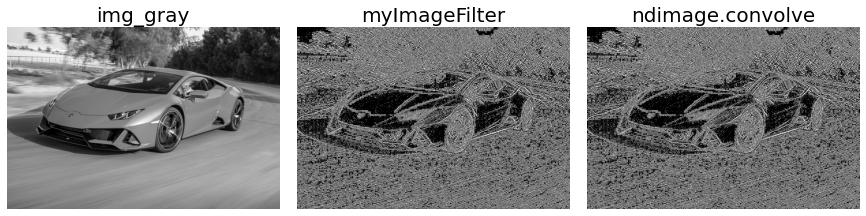

In [ ]:
# Comparing the plots
plt.figure(figsize=(12,2.8))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('img_gray', fontsize=20)
plt.subplot(132)
plt.imshow(cv2.cvtColor(myImageFilter(img_gray, KERNEL), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('myImageFilter', fontsize=20)
plt.subplot(133)
plt.imshow(cv2.cvtColor(img_con, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('ndimage.convolve', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

## Implement Freeman and Adelson's steerable filter.
The input should be a grayscale or color image and the output should be a multi-banded image consisteing of $G^0_1$ of $0^0$ and $G^0_1$ of $90^0$. The coefficients for the filter can be found by Fremand and Adelson (1991). Test the various order filters on a number of images of your choice and see if you can reliablly found corners and intersection features.

(-0.5, 1599.5, 1066.5, -0.5)

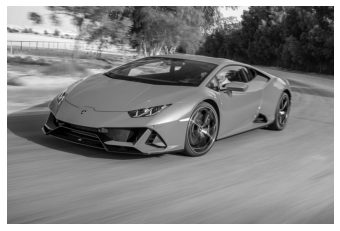

In [ ]:
#5 Steerable Filter

path = 'lambo.jpg'
lambo = cv2.imread(path, 0)
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)cv2_imshow(lambo)

plt.figure()
plt.imshow(cv2.cvtColor(lambo, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
from scipy.signal import convolve2d

def filter_steerable(image, theta, sigma=1, filter_size=9):
    # g(x,y) = e^-((x^2+y^2)2)
    x = np.arange(-filter_size // 3, filter_size // 3)
    # 1D Gaussian (ignore scalling constant)
    g = np.array([np.exp(-(x**2) / (2 * sigma**2))])
    # print(g.T,g,sep="\n")

    # first-derivative of 1D Gaussian
    gp = np.array([-(x/sigma) * np.exp(-(x**2) / (2 * sigma**2))])

    ix = convolve2d(image, -gp, mode='same')
    ix = convolve2d(ix, g.T, mode='same')

    iy = convolve2d(image, g, mode='same')
    iy = convolve2d(iy, -gp.T, mode='same')

    output = np.cos(theta) * ix + np.sin(theta) * iy

    return output

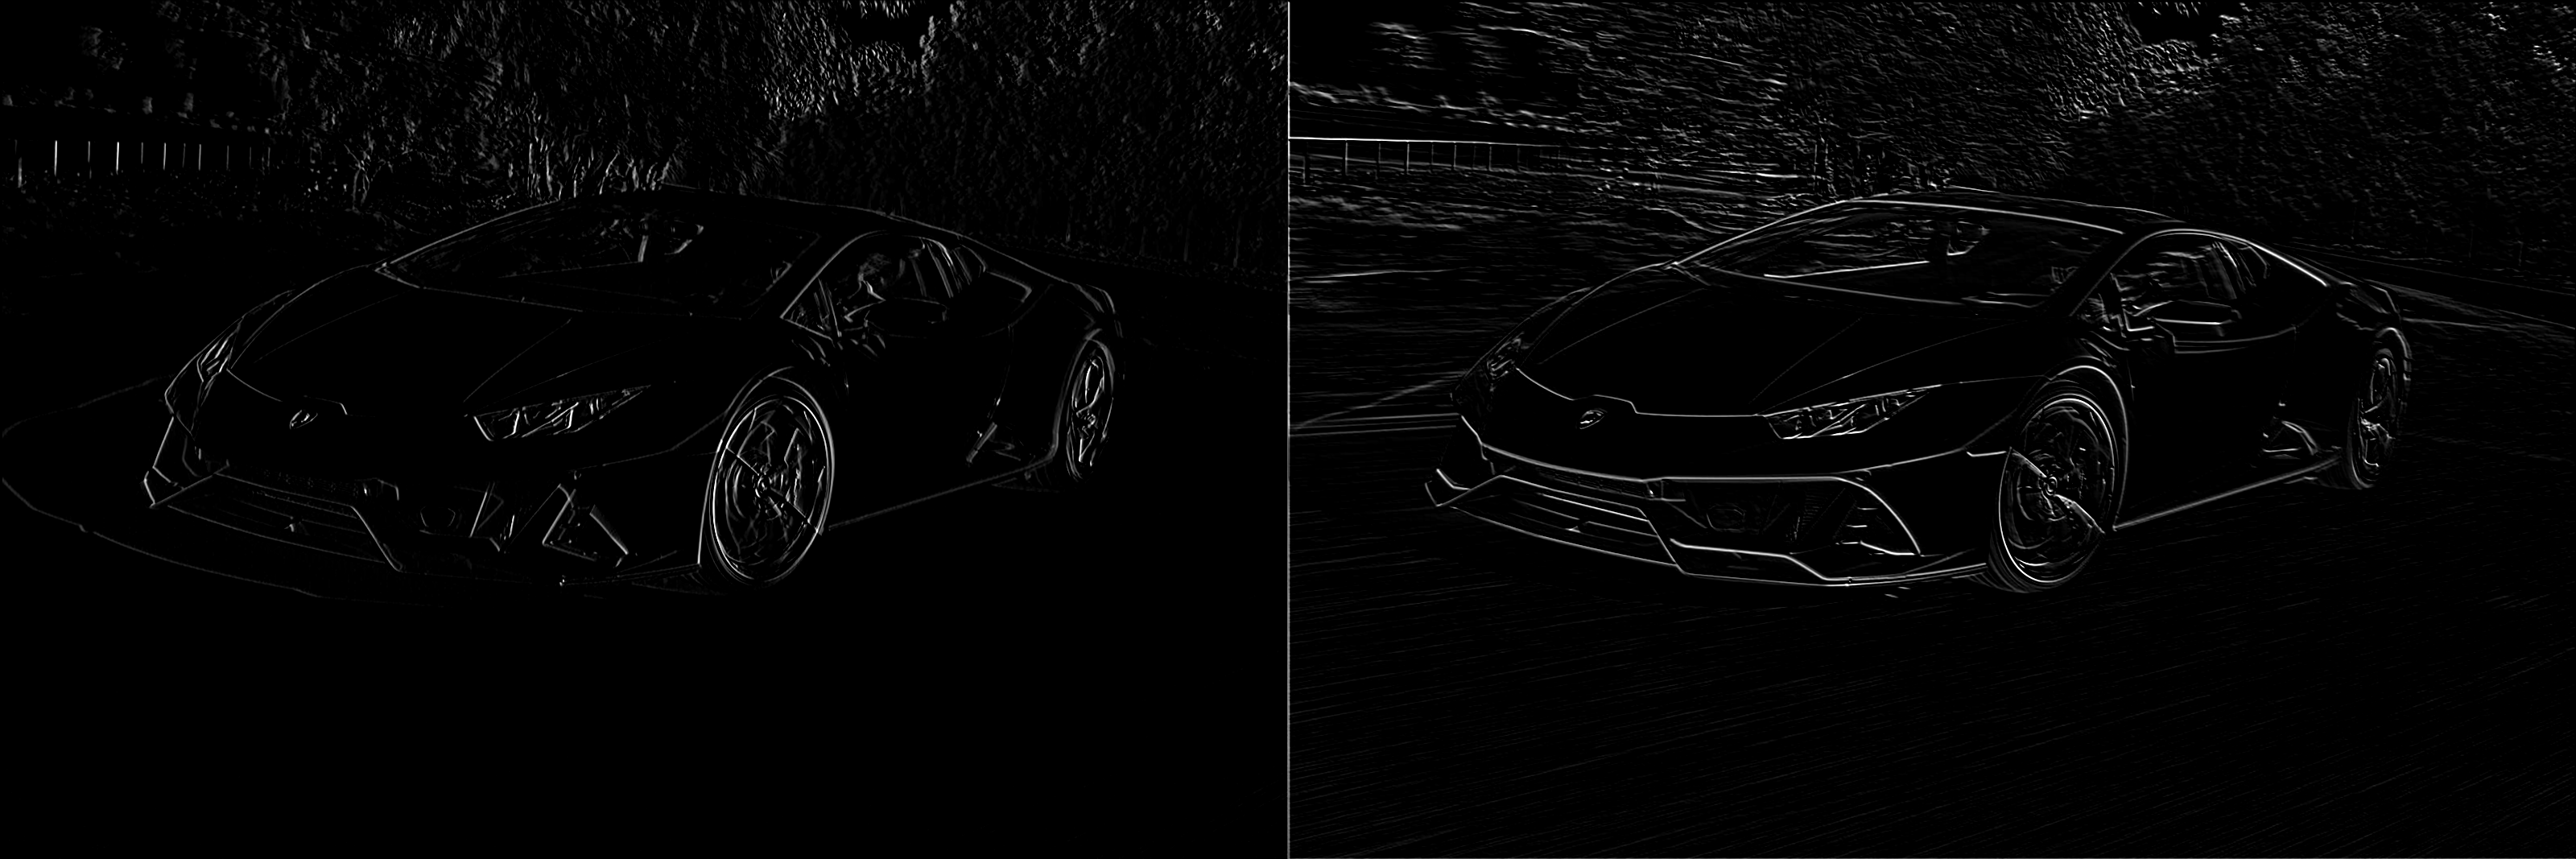

In [ ]:
zero_deg = filter_steerable(lambo,0)
ninety_deg = filter_steerable(lambo,90)

horizontalStack = np.concatenate((zero_deg, ninety_deg), axis=1)

cv2.imwrite("lambo_steered.jpg", horizontalStack)

cv2_imshow(horizontalStack)

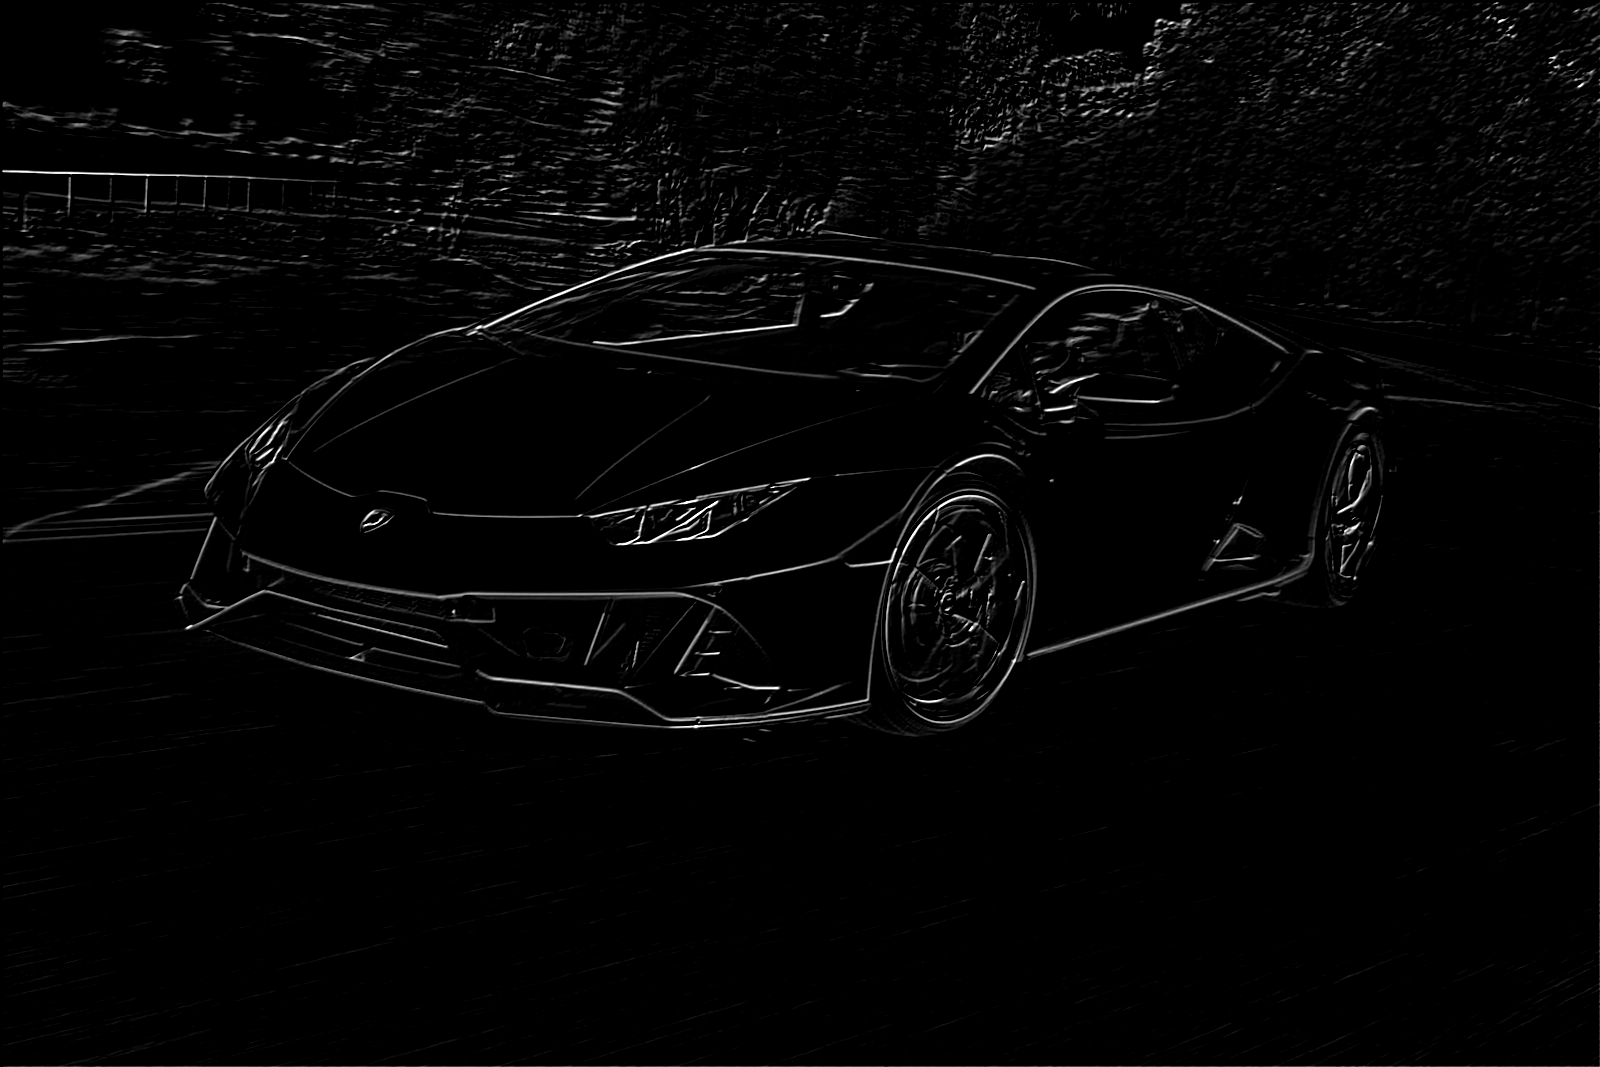

In [ ]:
# Combined both 0 and 90 degree filters

combined_steer = zero_deg + ninety_deg
cv2_imshow(combined_steer)